# Model Test Round Two 
Now that I have seen what my model does as a baseline, I can start making some changes, namely resampling  

## Set-up the Data 
As always I will start by importing the necessary packages and setting up the dataframes.

In [1]:
#Code for importing packages
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")  
import numpy as np 
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 
from scipy.spatial.distance import euclidean 
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier   
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel  
from imblearn.over_sampling import SMOTE, ADASYN 
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression 
from sklearn.feature_selection import RFECV 
from sklearn.metrics import mean_squared_error

#Since most all my models ended up wanting me to create dummies anyway I will just work with the the dataset where I have already done that.

In [2]:
#Since most all my models ended up wanting me to create dummies anyway I will just work with the 
dfd = pd.read_csv('data_ad.csv') #Sets up dataframe that contains all dummies
del dfd['Unnamed: 0'] #deletes old index column

dfd.head()

,age,height,works_in_tech,female,male,bisexual,gay,straight,body_average,body_curvy/full_figured,...,virgo,language_unknown,speaks_bengali,speaks_chinese,speaks_english,speaks_hindi,speaks_japanese,speaks_portuguese,speaks_russian,speaks_spanish
0,22,75.0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,35,70.0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,29,66.0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,29,67.0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,31,65.0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
dfd.works_in_tech.value_counts()

0    28760
1     9557
Name: works_in_tech, dtype: int64

In [4]:
#Variable Set Up
data = dfd.drop(["works_in_tech"],axis=1) 
target = dfd["works_in_tech"]

In [5]:
#Baseline Accuracy 
neg_obs = dfd.works_in_tech.value_counts()[0] 
pos_obs = dfd.works_in_tech.value_counts()[1] 
all_obs = neg_obs + pos_obs
baseline_accuracy = pos_obs / all_obs 
baseline_accuracy

0.2494193177962784

## Model Test 
Now we can begin our model test with rebalanced classes using smote. 

#### Logistic Regression 
First I will look at logistic regression as well as a few metrics from the confusion matrix.

In [6]:
#Set Variables
X = data
y = target 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

#Rebalance with 
sm = SMOTE(sampling_strategy = 'minority', random_state = 123)
X_train, y_train = sm.fit_resample(X_train, y_train)  

print(pd.Series(y_train).value_counts())

1    21581
0    21581
Name: works_in_tech, dtype: int64


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
AUC: 0.728154546739852
AUC: 0.728154546739852


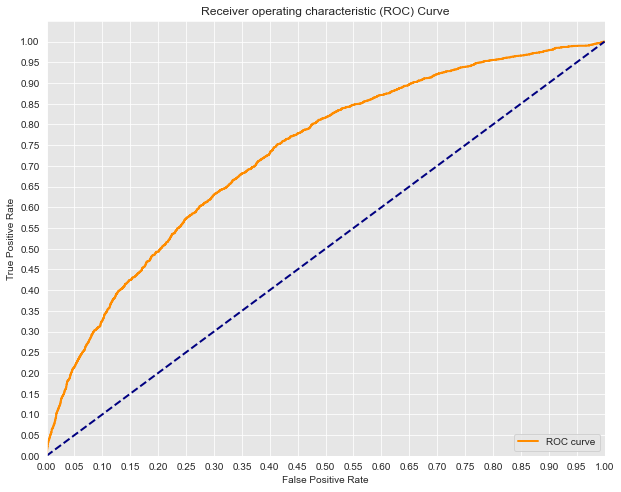

In [8]:
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score) 

#Calculate AUC 
print('AUC: {}'.format(auc(fpr, tpr))) 
#Example visualizing of ROC and AUC: 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show() 

[[18863  9897]
 [ 3171  6386]]


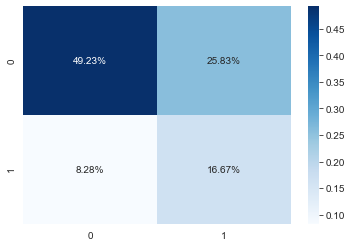

In [9]:
y_pred = logreg.predict(X)
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues') 
plt.show()

In [10]:
# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [11]:
def precision(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp) 

def recall(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn) 

def accuracy(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat)) 

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [12]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training Precision:  0.6740868336204231
Testing Precision:  0.3939831528279182



Training Recall:  0.7071961447569621
Testing Recall:  0.6817992503123699



Training Accuracy:  0.6826375052129188
Testing Accuracy:  0.65741127348643



Training F1-Score:  0.6902446745963547
Testing F1-Score:  0.4993898718730933


#### Logistic Regression 

As compared to baseline accuracy as well as the unbalanced model test, this model does perform significantly better even before feature selection and any boosting. Though it is also rather overfit.

### KNN Model 
Now I will run my model without dummies thru a KNN model. 

In [13]:
df1 = dfd.copy()

In [14]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=data.columns)

In [15]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [16]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.32894736842105265
Recall Score: 0.5830903790087464
Accuracy Score: 0.5973903966597077
F1 Score: 0.4206098843322818


In [17]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score)) 

In [18]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test) 

Best Value for k: 23
F1-Score: 0.4585686145764937


#### KNN Conclusion 

Although this model also performs better than the baseline and unbalanced dta models, it does not preform as well than the logistic regression model. 

### Decision Tree Model 
Now I will run my model without dummies thru a decision model. 

In [19]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy')

In [20]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training Precision:  0.6740868336204231
Testing Precision:  0.3939831528279182



Training Recall:  0.7071961447569621
Testing Recall:  0.6817992503123699



Training Accuracy:  0.6826375052129188
Testing Accuracy:  0.65741127348643



Training F1-Score:  0.6902446745963547
Testing F1-Score:  0.4993898718730933


#### Decision Tree Conclusion 
Decision tree also appears to perform better than the previous version but also appers overfit. 

### Random Forest Tree Model 
Now I will run my model without dummies thru a random forest model. 

In [21]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=5, presort=False)

In [23]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4159 3020]
 [ 739 1662]]
              precision    recall  f1-score   support

           0       0.85      0.58      0.69      7179
           1       0.35      0.69      0.47      2401

    accuracy                           0.61      9580
   macro avg       0.60      0.64      0.58      9580
weighted avg       0.73      0.61      0.63      9580



In [24]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 60.76%


In [25]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

RandomForestClassifier(max_depth=5, random_state=123)

In [27]:
# Test set predictions
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4465 2714]
 [ 725 1676]]
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      7179
           1       0.38      0.70      0.49      2401

    accuracy                           0.64      9580
   macro avg       0.62      0.66      0.61      9580
weighted avg       0.74      0.64      0.66      9580



### Random Forest 
This model appears to perform the best of the models I tried and so will be moving forward with this model after performing a bit of feature selection. While I have already begun a bit of that here, I will be doing a few more feature selection tests in the next section before making my final selection. 

## Feature Selection  

I will now use random forest to select which features to move forward with. 

In [28]:
len(dfd.columns)

75

In [29]:
feat_labels = ['age', 'height', 'female', 'male', 'bisexual', 'gay', 'straight', 'body_average', 'body_curvy/full_figured', 'body_fit/athletic', 'body_thin/skinny', 
               'unknown_body_type',  'diet_anything', 'diet_other', 'diet_vegan/vegetarian', 'unkown_diet','drinks_rarely/not_at_all', 'unknown_if_drinker', 'no_drugs',
               'unknown_if_drugs', 'college_graduate_or_higher', 'no_college_degree','unknown_education', 'asian', 'black', 'ethnicity_other/unknown',  'hispanic/latin', 
               'indian', 'middle_eastern', 'white', 'has_kids', 'no_kids', 'unknown_if_kids', 'dislikes_cats_and_or_dogs', 'likes_cats',  'likes_dogs', 'likes_dogs_and_cats',
               'unknown_pet_feelings', 'agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity','hinduism', 'islam', 'judaism', 'religion_other/unknown',
               'does_not_smoke', 'unknown_if_smokes', 'not_above_average_height', 'not_san_francisco', 'san_francisco_ca', 'aquarius', 'aries', 'cancer', 'capricorn', 
               'gemini', 'leo', 'libra', 'pisces', 'sagittarius', 'scorpio', 'sign_unknown', 'taurus', 'virgo', 'language_unknown','speaks_bengali', 'speaks_chinese', 
               'speaks_english', 'speaks_hindi', 'speaks_japanese', 'speaks_portuguese', 'speaks_russian', 'speaks_spanish']

In [30]:
# Create a forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('age', 0.0850507017364356)
('height', 0.08714575358191554)
('female', 0.04088925513740705)
('male', 0.04083211035273725)
('bisexual', 0.003021089759551016)
('gay', 0.009943337365736295)
('straight', 0.012409465960618161)
('body_average', 0.01500927749524342)
('body_curvy/full_figured', 0.011805381362815965)
('body_fit/athletic', 0.018465393185902165)
('body_thin/skinny', 0.00930948070073143)
('unknown_body_type', 0.008260499053122391)
('diet_anything', 0.017034571231823385)
('diet_other', 0.0045156221343091675)
('diet_vegan/vegetarian', 0.008777403637753168)
('unkown_diet', 0.015676857473155403)
('drinks_rarely/not_at_all', 0.016433004795624987)
('unknown_if_drinker', 0.004445764980490294)
('no_drugs', 0.018035442606751453)
('unknown_if_drugs', 0.014438177771130092)
('college_graduate_or_higher', 0.018453991321656177)
('no_college_degree', 0.010351067552331018)
('unknown_education', 0.007220335141832885)
('asian', 0.011105350184669287)
('black', 0.006259067830789479)
('ethnicity_other

In [31]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.
sfm = SelectFromModel(clf, threshold=0.0099)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.0099)

In [32]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age
height
female
male
gay
straight
body_average
body_curvy/full_figured
body_fit/athletic
diet_anything
unkown_diet
drinks_rarely/not_at_all
no_drugs
unknown_if_drugs
college_graduate_or_higher
no_college_degree
asian
ethnicity_other/unknown
white
no_kids
unknown_if_kids
likes_dogs
likes_dogs_and_cats
unknown_pet_feelings
agnosticism
atheism
christianity
religion_other/unknown
does_not_smoke
not_above_average_height
not_san_francisco
san_francisco_ca
cancer
libra
scorpio
sign_unknown
virgo
speaks_english
speaks_spanish


In [45]:
selected_feat = [ 'age', 'height', 'female', 'male', 'gay', 'straight', 'body_average', 'body_curvy/full_figured', 'body_fit/athletic', 'diet_anything', 'unkown_diet',
                 'drinks_rarely/not_at_all', 'no_drugs', 'unknown_if_drugs', 'college_graduate_or_higher', 'no_college_degree', 'asian', 'ethnicity_other/unknown',  'white', 
                 'no_kids', 'unknown_if_kids', 'likes_dogs', 'likes_dogs_and_cats', 'unknown_pet_feelings', 'agnosticism', 'atheism', 'christianity', 'religion_other/unknown',
                 'does_not_smoke', 'not_above_average_height', 'not_san_francisco', 'san_francisco_ca', 'cancer', 'capricorn', 'libra', 'scorpio', 'sign_unknown', 'virgo', 
                 'speaks_english', 'speaks_spanish' , 'works_in_tech'] 
sel_feat_ds = dfd[selected_feat] 
sel_feat_ds.head()

,age,height,female,male,gay,straight,body_average,body_curvy/full_figured,body_fit/athletic,diet_anything,...,san_francisco_ca,cancer,capricorn,libra,scorpio,sign_unknown,virgo,speaks_english,speaks_spanish,works_in_tech
0,22,75.0,0,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,35,70.0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,29,66.0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,29,67.0,0,1,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,31,65.0,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [34]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [35]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [36]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.7548016701461377

In [37]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.7453027139874739

# Conclusion 

In my final notebook, I will give a brief recap of everything I have done here as well as work to improve my chosen model and discuss the the business case use for it.  

In [46]:
sel_feat_ds.to_csv('selected_feat_data.csv')